```
BEGIN ASSIGNMENT
export_cell:
  instructions: "When done exporting, download the .zip file by `SHIFT`-clicking on the file name and selecting **Save Link As**. Or, find the .zip file in the left side of the screen and right-click and select **Download**. You'll submit this .zip file for the assignment in Canvas to Gradescope for grading."
pdf: false
files: 
  - birth_weights.csv
  - durham_city_employees.csv
```

# TCM 21

## Using Pyhon to Simulate and Visualize Statistics

### Sections

<a href='#confidence_intervals'>1. Confindence Intervals</a>

<a href='#ab_testing'>2. A/B Testing</a>

Run the cell below to import packages and set plotting options.

In [1]:
from datascience import *

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import otter
grader = otter.Notebook()

plt.style.use('fivethirtyeight')
%matplotlib inline

<a id='confidence_intervals'></a>

## 1. Confidence Intervals

### 1.1. Employment Data from the City of Durham

The following code will read in a table that contains a random sample of 200 workers from the City of Durham. 

**Example 1.** Run the cell below to load the file `durham_city_employees.csv` as a table.

In [2]:
sample_employees = Table().read_table('durham_city_employees.csv')
sample_employees

SALARY,TITLE,DEPARTMENT
39224.3,TECHNICIAN,PUBLIC WORKS
57210.7,POLICE SERGEANT,POLICE
41250.3,FIRE TECHNICIAN,FIRE
35668.7,CREW CHIEF II,WATER MANAGEMENT
15496,COUNSELOR ASST SPEC,PARKS & RECREATION
64754,POLICE LIEUTENANT,POLICE
70145.1,POLICE LIEUTENANT,POLICE
39285.9,FIREFIGHTER,FIRE
76125,ASST DIRECTOR GENERAL SERVICES,GENERAL SERVICES
68223.1,POLICE CAPTAIN,POLICE


**Example 2.** Run the cell below will generate a histogram that shows the distribution of salaries from the sample.

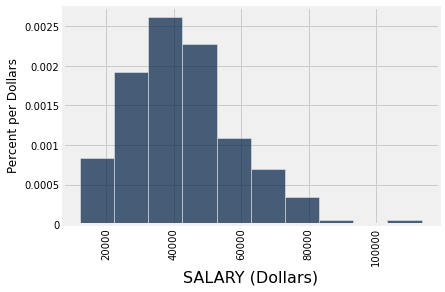

In [3]:
sample_employees.hist('SALARY', unit = "Dollars")

The `percentile()` function returns returns the *p*th percentile of the input array (the value that is at least as great as *p*$\%$ of the values in the array)

**Example 3.** Use the `percentile()` function to find the salary that is greater than or equal to 50% of the employees in the sample.

In [4]:
percentile(50, sample_employees.column('SALARY'))

40048.84

The `median` function from the `numpy` package will reutrn the median from an array of numbers.

**Example 4.** Use the `np.median()` function to find the median salary of the employees in the sample.

In [5]:
np.median(sample_employees.column('SALARY'))

40103.96

**Question 1.** Why do you think the value in **Example 3.** is different from the value in **Example 4.**?

```
BEGIN QUESTION
name: q1
manual: true
```

**SOLUTION:** Answers may vary.

### 1.2. The Goal

We'd like to know what the median salary is for **all** workers from the City of Durham, not just from our sample of 200 workers. This particular sample may vary depending on which 200 workers are selected. We will resample our sample from the population to determine a measure of how variable the median might be, and then build an interval that we feel the true median of the population should be between.

### 1.2.1. Resampling

**Example 5.** By using the `np.median()` function we can sample our sample from the population. Run the cell below a few times, then answer **Question 2.**.

In [6]:
np.median(sample_employees.sample(with_replacement = True).column('SALARY'))

43940.57

**Question 2.** Create an array named `medians` that contains the median of 1000 samples (`with_replacement`) of the `sample_employees` table.

```
BEGIN QUESTION
name: q2
manual: false
```

In [7]:
# BEGIN SOLUTION NO PROMPT
medians = make_array()
repetitions = 1000

for _ in np.arange(repetitions):
    medians = np.append(medians, np.median(sample_employees.sample(with_replacement = True).column('SALARY')))
# END SOLUTION
""" # BEGIN PROMPT
medians = make_array()
repetitions = ...

for _ in np.arange(...):
    medians = np.append(medians, np.median(sample_employees.sample(with_replacement = True).column('SALARY')))
"""; # END PROMPT

In [8]:
# TEST
repetitions == 1000

True

**Example 6.** Run the cell below to plot the empirical distribution of the medians of the 1000 samples of our sample.

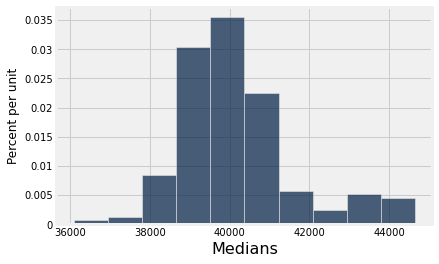

In [9]:
Table().with_column('Medians', medians).hist()

**Question 3.** What is the interval that contains 95% of the medians?

```
BEGIN QUESTION
name: q3
manual: false
```

In [10]:
lower_bound = percentile(2.5, medians) # SOLUTION NO PROMPT
upper_bound = percentile(97.5, medians) # SOLUTION NO PROMPT
""" # BEGIN PROMPT
lower_bound = percentile(..., medians)
upper_bound = percentile(..., medians)
"""; # END PROMPT
print('The 95% confidence interval starts at',lower_bound ,'and goes to', upper_bound)

The 95% confidence interval starts at 38043.2 and goes to 43883.06


In [11]:
# TEST
lower_bound == percentile(2.5, medians)

True

In [12]:
# TEST
upper_bound == percentile(97.5, medians)

True

**Example 7.** Let's visualize our emperical distribution using a histogram with the 95% confidence interval overlayed.

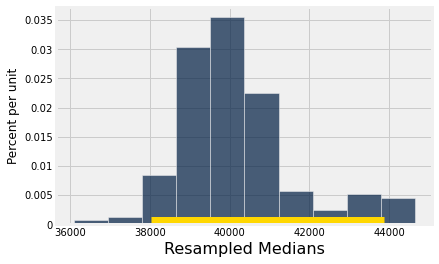

In [13]:
Table().with_column('Resampled Medians', medians).hist()
plt.plot([lower_bound, upper_bound], [0, 0], color = 'gold', lw = 15);

<a id='confidence_intervals'></a>
## 2. A/B Testing

The following code will read in a table that contains a the birth weights of babies delivered from smoking and non-smoking mothers. 

**Example 8.** Run the cell below to load the file `birth_weights.csv` as a table.

In [14]:
birth_weights = Table.read_table('birth_weights.csv')
birth_weights

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


### 2.1. The Goal

We want to determine if there is an association between smoking and the birth weight of a baby?

**Question 4.** Do you think the birth weight of the baby was effected by whether or not thte mother smoked?

```
BEGIN QUESTION
name: q4
manual: true
```

**SOLUTION:** Answers will vary.

**Question 5.** Make a table named `smoking_and_birthweight` that contains `Maternal Smoker` and `Birth Weight` columns from the `birth_weights` table.

```
BEGIN QUESTION
name: q5
manual: true
```

In [15]:
# BEGIN SOLUTION NO PROMPT
smoking_and_birthweight = birth_weights.select('Birth Weight', 'Maternal Smoker')
# END SOLUTION
""" # BEGIN PROMPT
smoking_and_birthweight = birth_weights.select('...', '...')
"""; # END PROMPT
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


**Question 6.** How many smokers and non-smokers are in the study?

```
BEGIN QUESTION
name: q6
manual: false
```

In [16]:
maternal_smoker = smoking_and_birthweight.where('Maternal Smoker', True).num_rows # SOLUTION NO PROMPT
maternal_nonsmoker = smoking_and_birthweight.num_rows - maternal_smoker # SOLUTION NO PROMPT
""" # BEGIN PROMPT
maternal_smoker = smoking_and_birthweight.where('...', True).num_rows
maternal_nonsmoker = smoking_and_birthweight.num_rows - maternal_smoker
"""; # END PROMPT
print('There are',maternal_smoker,'smokers and',maternal_nonsmoker,'non-smokers in the study.')

There are 459 smokers and 715 non-smokers in the study.


In [17]:
# TEST
maternal_smoker

459

In [18]:
# TEST
maternal_nonsmoker

715

**Example 9.** Make a histogram of the birth wieghts of the babies of the smokers.

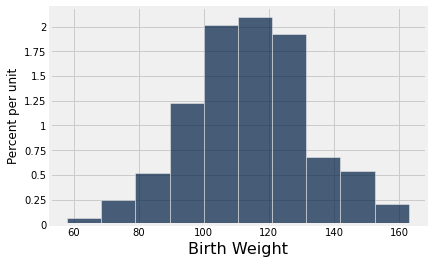

In [19]:
smoking_and_birthweight.where('Maternal Smoker', True).hist('Birth Weight')

**Example 10.** Make a histogram of the birth wieghts of the babies of the non-smokers.

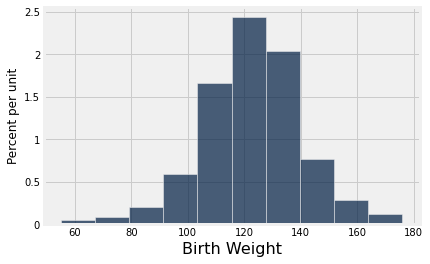

In [20]:
smoking_and_birthweight.where('Maternal Smoker', False).hist('Birth Weight')

**Example 11.** Let's overlay the histograms from **Example 9.** and **Example 10.**.

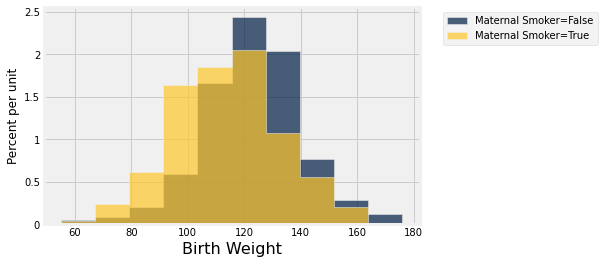

In [21]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message = "Creating an ndarray from ragged")

smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

**Question 7.** What is the average birth weight for the smokers and the non-smokers?

```
BEGIN QUESTION
name: q7
manual: true
```

In [22]:
avg_birthweight = smoking_and_birthweight.group('Maternal Smoker', np.average) # SOLUTION NO PROMPT
""" # BEGIN PROMPT
avg_birthweight = smoking_and_birthweight.group('...', np.average)
"""; # END PROMPT
avg_birthweight

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [23]:
# TEST
avg_birthweight.column(1).item(0)

123.08531468531469

In [24]:
# TEST
avg_birthweight.column(1).item(1)

113.81917211328977

**Question 8.** What is the difference between the average birth weight between the smokers and non-smokers?

```
BEGIN QUESTION
name: q8
manual: false
```

In [25]:
diff_btween_avg_birthweight = avg_birthweight.column('Birth Weight average').item(0)- avg_birthweight.column('Birth Weight average').item(1) # SOLUTION NO PROMPT
""" # BEGIN PROMPT
diff_btween_avg_birthweight = avg_birthweight.column('...').item(0)- avg_birthweight.column('...').item(1)
diff_btween_avg_birthweight"""; # END PROMPT
diff_btween_avg_birthweight

9.266142572024918

In [26]:
# TEST
diff_btween_avg_birthweight

9.266142572024918

### 2.2. A Difference in the Mean 

What is the cause of this difference? Would the difference in our sample be the same for the population? Could the difference be due to chance alone? What would be a good test statistic? 

Let's investigate.

**Question 9.** Write the Null and the Alternative Hypotheses.

```
BEGIN QUESTION
name: q9
manual: true
```

**SOLUTION:** Answers will vary.

Let's do the following:

    
1. Make an array of shuffled weights.
    
2. Make a table with the shuffled weights assigned to the group lables.
    
3. Make an array of means of the two groups (smoker and non-smoker).
    
4. Calculate the difference between the means of the two groups.

**Question 10.** Create a table named `weights` that only has one column with the wieghts for each baby in the sample.

```
BEGIN QUESTION
name: q10
manual: true
```

In [27]:
# BEGIN SOLUTION NO PROMPT
weights = birth_weights.select('Birth Weight')
# END SOLUTION
""" # BEGIN PROMPT
weights = birth_weights.select('...')
"""; # END PROMPT
weights

Birth Weight
120
113
128
108
136
138
132
120
143
140


If we use the `.sample` method and do not specify a sample amount the values in the column will be shuffled.

**Example 11.** Run the cell below to shuffle the weights.

In [28]:
shuffled_weights = weights.sample(with_replacement = False)
shuffled_weights

Birth Weight
156
107
129
118
126
136
117
135
163
96


**Question 11.** Create a table named `shuffled_birthweight_table` that has the column names `Maternal Smoker`, `Shuffled Weight`, and `Original Weight`.

```
BEGIN QUESTION
name: q11
manual: true
```

In [29]:
shuffled_weights = weights.sample(with_replacement = False)
# BEGIN SOLUTION NO PROMPT
shuffled_birthweight_table = Table().with_columns('Maternal Smoker', birth_weights.column('Maternal Smoker'),
                                                  'Shuffled Weight', shuffled_weights.column('Birth Weight'),
                                                  'Original Weight', weights.column('Birth Weight')
                                                 )
# END SOLUTION
""" # BEGIN PROMPT
shuffled_birthweight_table = Table().with_columns('...', birth_weights.column('Maternal Smoker'),
                                                  '...', shuffled_weights.column('Birth Weight'),
                                                  '...', weights.column('Birth Weight')
                                                 )
"""; # END PROMPT
shuffled_birthweight_table

Maternal Smoker,Shuffled Weight,Original Weight
False,105,120
False,120,113
True,129,128
True,119,108
False,129,136
False,136,138
False,126,132
False,119,120
True,126,143
False,107,140


**Question 12.** Make an array named `birth_weight_means` that contains the averages of the two groups (smoker and non-smoker).

```
BEGIN QUESTION
name: q12
manual: true
```

In [30]:
# BEGIN SOLUTION NO PROMPT
birth_weight_means = shuffled_birthweight_table.group('Maternal Smoker', np.average)
# END SOLUTION
""" # BEGIN PROMPT
birth_weight_means = shuffled_birthweight_table.group('...', np.average)
"""; # END PROMPT
birth_weight_means

Maternal Smoker,Shuffled Weight average,Original Weight average
False,119.72,123.085
True,119.061,113.819


Now let's find the difference in the average brith weight between smokers and non-smokers in the table with the shuffled weights.

**Example 12.** Run the cell below.

In [31]:
sample_diff = birth_weight_means.column(1).item(0)-birth_weight_means.column(1).item(1)
sample_diff

0.6592775416304875

**Example 13.** Run a simulation to make a table of 5000 sample differeces, make a histogram, and then plot the observed value (i.e. the value of `diff_btween_avg_birthweight`).

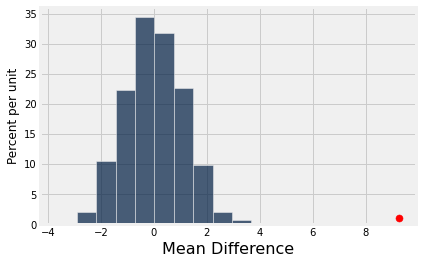

In [32]:
shuffled_weights_table = Table().with_column('Maternal Smoker', birth_weights.column('Maternal Smoker')) 

differences = make_array()
repetitions = 1000

for _ in np.arange(repetitions):
    shuffled_weights = weights.sample(with_replacement = False).column('Birth Weight')
    shuffled_weights_table = shuffled_weights_table.with_columns('Shuffled Weight', shuffled_weights) 
    birth_weight_means = shuffled_weights_table.group('Maternal Smoker', np.average).column(1)
    new_diff = birth_weight_means.item(0)-birth_weight_means.item(1)
    differences = np.append(differences, new_diff)

Table().with_column('Mean Difference', differences).hist()
plt.scatter(diff_btween_avg_birthweight, 0.01, color = 'red', s = 50);

**Question 14.** Use the plot from **Example 13.** to determine whether the observed statistic in the sample supports the null or the alternative hypothesis. 

```
BEGIN QUESTION
name: q14
manual: true
```

**SOLUTION:** Answers will vary